### **Importing Modules** <a id="4"></a>

In [ ]:
#Import data manipulation libraries
import pandas as pd
import numpy as np
import math

#Import the required Machine learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor


import keras
import tensorflow as tf
import pandas.api.types as ptypes
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta,Adam
from tensorflow.keras.layers import BatchNormalization,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

#Import the visualization libraries
import seaborn as sn
import matplotlib.pyplot as plt

#import access
import os

#Report
import tensorboard
import time

#Time
import datetime as datetime
print(tf.__version__)

2.8.2




### **Importing Datasets** <a id="4"></a>

#### Data From GDrive

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Skripsi/data-firebase/raw-data/newestdata.csv')
df.drop(['z_count', '_key', 'bitSoilSensor2', 'bitSoilSensor1', 'percentageSoilSensor1', 'voltageSoilSense1', 'voltageSoilSense2', 'week'], axis=1, inplace=True)
display(df.head())
original_df = df.copy(deep=True)
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Ts,percentageSoilSensor2,roomHumidity,roomTemperature,status
0,1648517134650,82,99.6,30.0,0.0
1,1648517734661,83,98.1,30.0,0.0
2,1648518334670,81,98.9,30.2,0.0
3,1648518934692,82,98.7,30.5,0.0
4,1648519534633,84,97.5,31.0,0.0



Inference: The Datset consists of 5 features & 9645 samples.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9645 entries, 0 to 9644
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Ts                     9645 non-null   int64  
 1   percentageSoilSensor2  9645 non-null   int64  
 2   roomHumidity           9645 non-null   float64
 3   roomTemperature        9645 non-null   float64
 4   status                 9644 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 376.9 KB


In [ ]:
display(df.head())
# neural_test = df.copy(deep=True)

,Ts,percentageSoilSensor2,roomHumidity,roomTemperature,status
0,1648517134650,82,99.6,30.0,0.0
1,1648517734661,83,98.1,30.0,0.0
2,1648518334670,81,98.9,30.2,0.0
3,1648518934692,82,98.7,30.5,0.0
4,1648519534633,84,97.5,31.0,0.0


In [ ]:
display(df.head())
neural_test = df.copy(deep=True)

,Ts,percentageSoilSensor2,roomHumidity,roomTemperature,status
0,1648517134650,82,99.6,30.0,0.0
1,1648517734661,83,98.1,30.0,0.0
2,1648518334670,81,98.9,30.2,0.0
3,1648518934692,82,98.7,30.5,0.0
4,1648519534633,84,97.5,31.0,0.0


### Checking Data type

In [ ]:
# neural_test['Date'] = pd.to_datetime(df['Date'], format='%y-%m-%d %H:%M:%S.%MS').dt.strftime('%Y-%m-%d %H:%M:%S')
# neural_test.set_index('Ts', inplace=True)
# neural_test = df.copy(deep=True)
# neural_test.to_csv('neuraltest.csv')
neural_test.dtypes

Ts                         int64
percentageSoilSensor2      int64
roomHumidity             float64
roomTemperature          float64
status                   float64
dtype: object

####TimeVariable

In [ ]:
# df.drop(['Date'], axis=1, inplace=True)
def features_build(df):
    df["Date"] = pd.to_datetime(df["Ts"], unit='ms')
    df["Date"] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Jakarta')
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['Hour'] = df.Date.dt.hour
    df['Minute'] = df.Date.dt.minute
    # df['Date'] = pd.to_datetime(df['Date'], format='%y-%m-%d %H:%M:%S.%MS').dt.strftime('%Y-%m-%d %H:%M:%S')
features_build(df)
df

,Ts,percentageSoilSensor2,roomHumidity,roomTemperature,status,Date,Month,Day,Hour,Minute
0,1648517134650,82,99.6,30.0,0.0,2022-03-29 08:25:34.650000+07:00,3,29,8,25
1,1648517734661,83,98.1,30.0,0.0,2022-03-29 08:35:34.661000+07:00,3,29,8,35
2,1648518334670,81,98.9,30.2,0.0,2022-03-29 08:45:34.670000+07:00,3,29,8,45
3,1648518934692,82,98.7,30.5,0.0,2022-03-29 08:55:34.692000+07:00,3,29,8,55
4,1648519534633,84,97.5,31.0,0.0,2022-03-29 09:05:34.633000+07:00,3,29,9,5
...,...,...,...,...,...,...,...,...,...,...
9640,1654663132278,57,99.9,28.9,1.0,2022-06-08 11:38:52.278000+07:00,6,8,11,38
9641,1654663732266,57,99.9,28.9,1.0,2022-06-08 11:48:52.266000+07:00,6,8,11,48
9642,1654664332262,56,99.9,29.1,1.0,2022-06-08 11:58:52.262000+07:00,6,8,11,58
9643,1654664932249,57,99.9,29.6,1.0,2022-06-08 12:08:52.249000+07:00,6,8,12,8


Invoke this one if cleaning data

In [ ]:
df = df[df.roomTemperature > 24]
df = df[df.percentageSoilSensor1 > 50]
df = df[df.percentageSoilSensor2 > 50]
df = df[df.roomHumidity > 60]
df = df[df.status <= 1]
df = df[df.roomTemperature <=35]

AttributeError: ignored

In [ ]:
neural_test = df.copy(deep=True)
# neural_test.drop(['Date', 'Ts'], axis=1, inplace=True)
neural_test.head()

### Taking Specified week

In [ ]:
neural_test = neural_test[neural_test.week <= 1]
neural_test.head()

AttributeError: ignored

### Checking null value

In [ ]:
neural_test.isnull().values.any()

True

In [ ]:
neural_test.isnull().sum().sum()

1

In [ ]:
neural_test = neural_test.dropna()

In [ ]:
count_nan_in_df = neural_test.isnull().sum()
print (count_nan_in_df)

Ts                       0
percentageSoilSensor2    0
roomHumidity             0
roomTemperature          0
status                   0
dtype: int64


In [ ]:
neural_test['status'] = neural_test['status'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
neural_test.head(5)

,Ts,percentageSoilSensor2,roomHumidity,roomTemperature,status
0,1648517134650,82,99.6,30.0,0
1,1648517734661,83,98.1,30.0,0
2,1648518334670,81,98.9,30.2,0
3,1648518934692,82,98.7,30.5,0
4,1648519534633,84,97.5,31.0,0


In [ ]:
y = neural_test['status']
x = neural_test.drop(['Ts', 'status'], axis=1)
# neural_test.drop(['Date', 'Ts'], axis=1, inplace=True)

In [ ]:
y.head(3)

0    0
1    0
2    0
Name: status, dtype: int64

In [ ]:
x.head()

,percentageSoilSensor2,roomHumidity,roomTemperature
0,82,99.6,30.0
1,83,98.1,30.0
2,81,98.9,30.2
3,82,98.7,30.5
4,84,97.5,31.0


### Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 169)

### **Data Visualization** <a id="4"></a>

##### Making time as variable

In [ ]:
timeVariableVisualization = df.copy(deep = True)
timeVariableVisualization

,Ts,bitSoilSensor1,bitSoilSensor2,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,voltageSoilSense1,voltageSoilSense2,week,Date,Month,Day,Hour,Minute
0,1648517134650,1738,1584,63,82,99.6,30.0,0.0,1.40703,1.27890,1,2022-03-29 08:25:34.650000+07:00,3,29,8,25
1,1648517734661,1714,1570,65,83,98.1,30.0,0.0,1.39978,1.27648,1,2022-03-29 08:35:34.661000+07:00,3,29,8,35
2,1648518334670,1727,1591,64,81,98.9,30.2,0.0,1.40220,1.28938,1,2022-03-29 08:45:34.670000+07:00,3,29,8,45
3,1648518934692,1633,1579,72,82,98.7,30.5,0.0,1.33128,1.28132,1,2022-03-29 08:55:34.692000+07:00,3,29,8,55
4,1648519534633,1613,1559,73,84,97.5,31.0,0.0,1.30388,1.26198,1,2022-03-29 09:05:34.633000+07:00,3,29,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1651123486560,1439,1422,90,95,97.3,33.4,0.0,1.17172,1.14755,5,2022-04-28 12:24:46.560000+07:00,4,28,12,24
4248,1651124087031,1445,1419,89,95,98.6,32.6,0.0,1.16850,1.14755,5,2022-04-28 12:34:47.031000+07:00,4,28,12,34
4249,1651124686534,1437,1412,90,95,98.4,32.9,0.0,1.16205,1.14352,5,2022-04-28 12:44:46.534000+07:00,4,28,12,44
4250,1651125286546,1442,1418,89,95,97.5,33.6,0.0,1.16527,1.14674,5,2022-04-28 12:54:46.546000+07:00,4,28,12,54


###### Taking Specified week

In [ ]:
timeVariableVisualizationWeek1 = timeVariableVisualization[timeVariableVisualization.week == 1]
timeVariableVisualizationWeek1.head()

,Ts,bitSoilSensor1,bitSoilSensor2,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,voltageSoilSense1,voltageSoilSense2,week,Date,Month,Day,Hour,Minute
0,1648517134650,1738,1584,63,82,99.6,30.0,0.0,1.40703,1.27890,1,2022-03-29 08:25:34.650000+07:00,3,29,8,25
1,1648517734661,1714,1570,65,83,98.1,30.0,0.0,1.39978,1.27648,1,2022-03-29 08:35:34.661000+07:00,3,29,8,35
2,1648518334670,1727,1591,64,81,98.9,30.2,0.0,1.40220,1.28938,1,2022-03-29 08:45:34.670000+07:00,3,29,8,45
3,1648518934692,1633,1579,72,82,98.7,30.5,0.0,1.33128,1.28132,1,2022-03-29 08:55:34.692000+07:00,3,29,8,55
4,1648519534633,1613,1559,73,84,97.5,31.0,0.0,1.30388,1.26198,1,2022-03-29 09:05:34.633000+07:00,3,29,9,5


In [ ]:
timeVariableVisualizationWeek1_NotIndexed = timeVariableVisualization.copy(deep = True)
timeVariableVisualizationWeek1_NotIndexed

,Ts,bitSoilSensor1,bitSoilSensor2,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,voltageSoilSense1,voltageSoilSense2,week,Date,Month,Day,Hour,Minute
0,1648517134650,1738,1584,63,82,99.6,30.0,0.0,1.40703,1.27890,1,2022-03-29 08:25:34.650000+07:00,3,29,8,25
1,1648517734661,1714,1570,65,83,98.1,30.0,0.0,1.39978,1.27648,1,2022-03-29 08:35:34.661000+07:00,3,29,8,35
2,1648518334670,1727,1591,64,81,98.9,30.2,0.0,1.40220,1.28938,1,2022-03-29 08:45:34.670000+07:00,3,29,8,45
3,1648518934692,1633,1579,72,82,98.7,30.5,0.0,1.33128,1.28132,1,2022-03-29 08:55:34.692000+07:00,3,29,8,55
4,1648519534633,1613,1559,73,84,97.5,31.0,0.0,1.30388,1.26198,1,2022-03-29 09:05:34.633000+07:00,3,29,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1651123486560,1439,1422,90,95,97.3,33.4,0.0,1.17172,1.14755,5,2022-04-28 12:24:46.560000+07:00,4,28,12,24
4248,1651124087031,1445,1419,89,95,98.6,32.6,0.0,1.16850,1.14755,5,2022-04-28 12:34:47.031000+07:00,4,28,12,34
4249,1651124686534,1437,1412,90,95,98.4,32.9,0.0,1.16205,1.14352,5,2022-04-28 12:44:46.534000+07:00,4,28,12,44
4250,1651125286546,1442,1418,89,95,97.5,33.6,0.0,1.16527,1.14674,5,2022-04-28 12:54:46.546000+07:00,4,28,12,54


In [ ]:
timeVariableVisualizationWeek1.set_index('Date', inplace=True)
timeVariableVisualizationWeek1.drop(['Ts'], axis=1, inplace=True)

timeVariableVisualizationWeek1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,bitSoilSensor1,bitSoilSensor2,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,voltageSoilSense1,voltageSoilSense2,week,Month,Day,Hour,Minute
Date,,,,,,,,,,,,,,
2022-03-29 08:25:34.650000+07:00,1738,1584,63,82,99.6,30.0,0.0,1.40703,1.27890,1,3,29,8,25
2022-03-29 08:35:34.661000+07:00,1714,1570,65,83,98.1,30.0,0.0,1.39978,1.27648,1,3,29,8,35
2022-03-29 08:45:34.670000+07:00,1727,1591,64,81,98.9,30.2,0.0,1.40220,1.28938,1,3,29,8,45
2022-03-29 08:55:34.692000+07:00,1633,1579,72,82,98.7,30.5,0.0,1.33128,1.28132,1,3,29,8,55
2022-03-29 09:05:34.633000+07:00,1613,1559,73,84,97.5,31.0,0.0,1.30388,1.26198,1,3,29,9,5


In [ ]:
# timeVariableVisualization.to_csv('alldata.csv')

##### Import week sliced data from local

In [ ]:
# weekVisualization = pd.read_csv('/content/drive/MyDrive/Data Skripsi/data-firebase/week1.csv')
# weekVisualization.drop(['Minute', 'Day', 'Month' ], axis=1, inplace=True)
display(timeVariableVisualizationWeek1.head())
print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(timeVariableVisualizationWeek1.shape[1], timeVariableVisualizationWeek1.shape[0]))

,bitSoilSensor1,bitSoilSensor2,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,voltageSoilSense1,voltageSoilSense2,week,Month,Day,Hour,Minute
Date,,,,,,,,,,,,,,
2022-04-18 09:20:52.030000+07:00,1478,1475,85,90,99.9,33.7,0.0,1.20637,1.19912,4,4,18,9,20
2022-04-18 09:30:52.015000+07:00,1478,1474,85,90,99.9,33.8,0.0,1.19912,1.18864,4,4,18,9,30
2022-04-18 09:40:52.008000+07:00,1462,1449,87,92,99.8,33.9,0.0,1.19590,1.17817,4,4,18,9,40
2022-04-18 09:50:52.013000+07:00,1474,1463,85,91,99.8,34.3,0.0,1.20396,1.19348,4,4,18,9,50
2022-04-18 10:00:52.005000+07:00,1471,1463,85,91,99.2,34.6,0.0,1.19912,1.18864,4,4,18,10,0



Inference: The Datset consists of 14 features & 910 samples.


### Kelembaban Tanah dan Pot 1-2

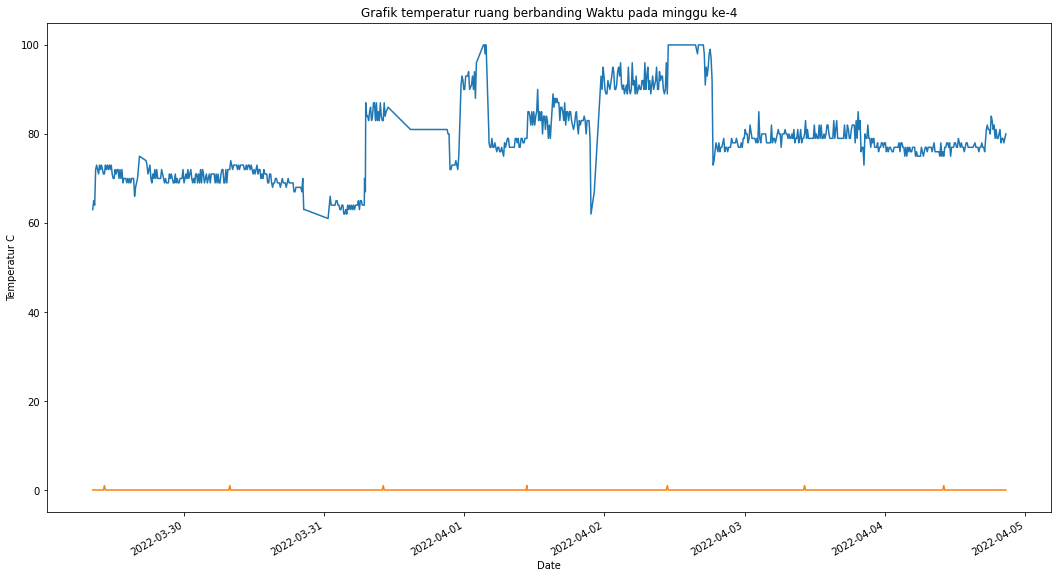

In [ ]:
plt.figure(figsize=(18,10))
temperatur = timeVariableVisualizationWeek1['percentageSoilSensor1']
status = timeVariableVisualizationWeek1['status']

plt.title('Grafik temperatur ruang berbanding Waktu pada minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Temperatur C')
temperatur.plot()
status.plot()

##### **Suhu Udara Berbanding Waktu** 

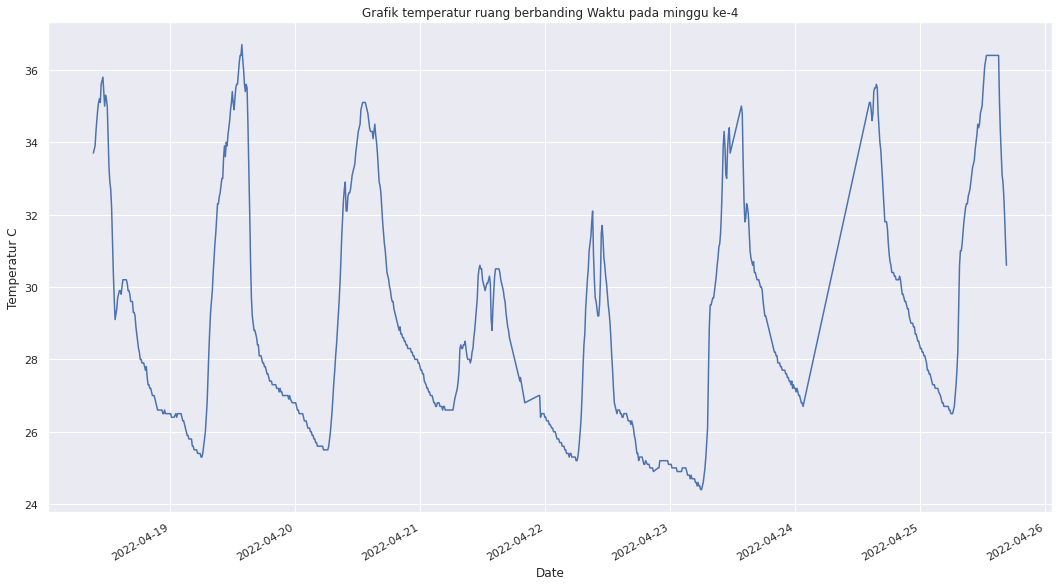

In [ ]:
plt.figure(figsize=(18,10))
temperatur = timeVariableVisualizationWeek1['roomTemperature']

plt.title('Grafik temperatur ruang berbanding Waktu pada minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Temperatur C')
temperatur.plot()

##### **Kelembaban Tanah Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['Ts'], df['soilHum'])
# plt.title('Grafik Kelembaban Tanah berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Kelembaban Tanah')
# plt.tight_layout()

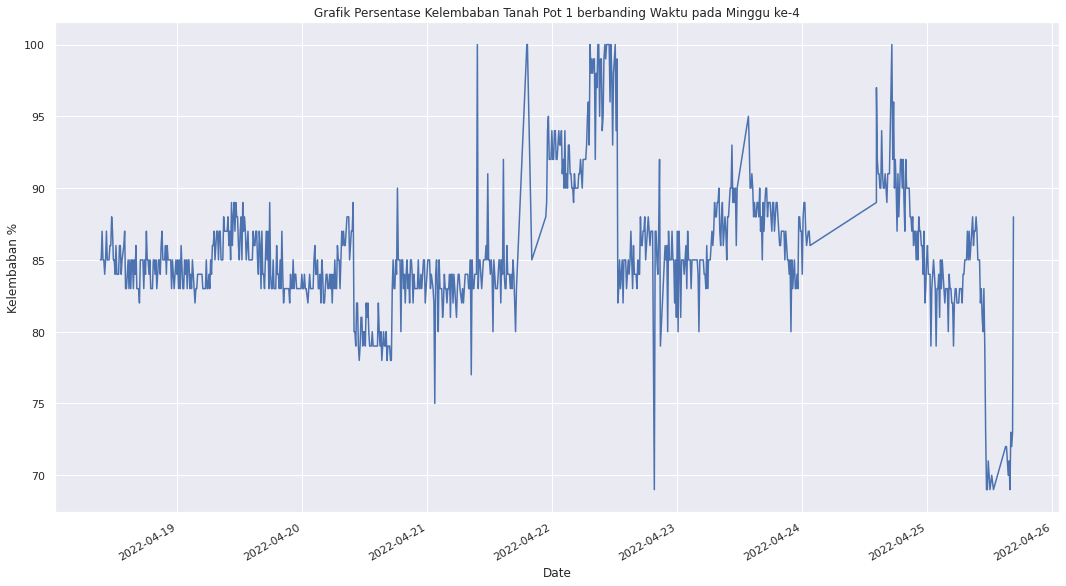

In [ ]:
plt.figure(figsize=(18,10))
soilHumidity = timeVariableVisualizationWeek1['percentageSoilSensor1']

plt.title('Grafik Persentase Kelembaban Tanah Pot 1 berbanding Waktu pada Minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
soilHumidity.plot()

##### **Kelembaban Tanah Pot 2 Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['Ts'], df['soilHum'])
# plt.title('Grafik Kelembaban Tanah berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Kelembaban Tanah')
# plt.tight_layout()

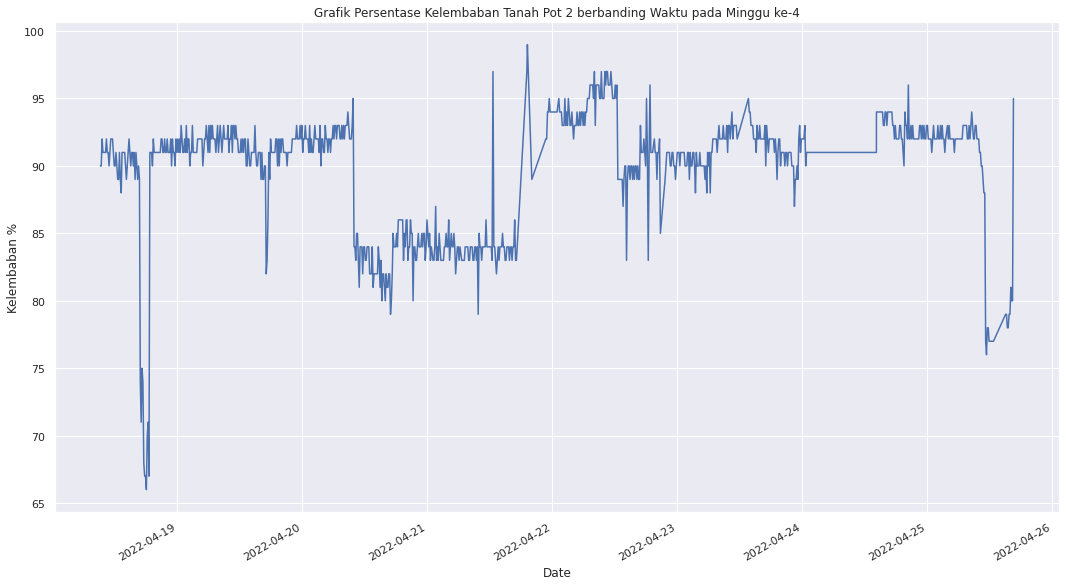

In [ ]:
plt.figure(figsize=(18,10))
soilHumidity = timeVariableVisualizationWeek1['percentageSoilSensor2']

plt.title('Grafik Persentase Kelembaban Tanah Pot 2 berbanding Waktu pada Minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
soilHumidity.plot()

##### **Kelembaban Udara Berbanding Waktu** 

In [ ]:
# plt.figure(figsize=(18,10))
# plt.scatter(df['Ts'], df['humidity'])
# plt.title('Grafik Kelembaban Udara berbanding Waktu')
# plt.xlabel('Waktu')
# plt.ylabel('Kelembaban Udara')
# plt.tight_layout()

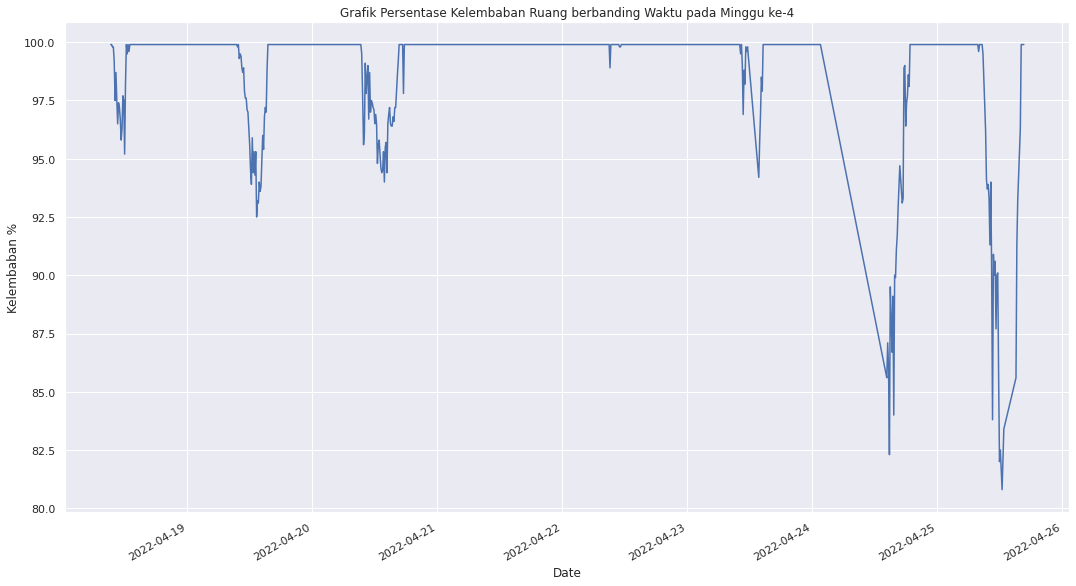

In [ ]:
plt.figure(figsize=(18,10))
humidity = timeVariableVisualizationWeek1['roomHumidity']

plt.title('Grafik Persentase Kelembaban Ruang berbanding Waktu pada Minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
humidity.plot()

##### **Kelembaban tanah pot 1 Berbanding Waktu**


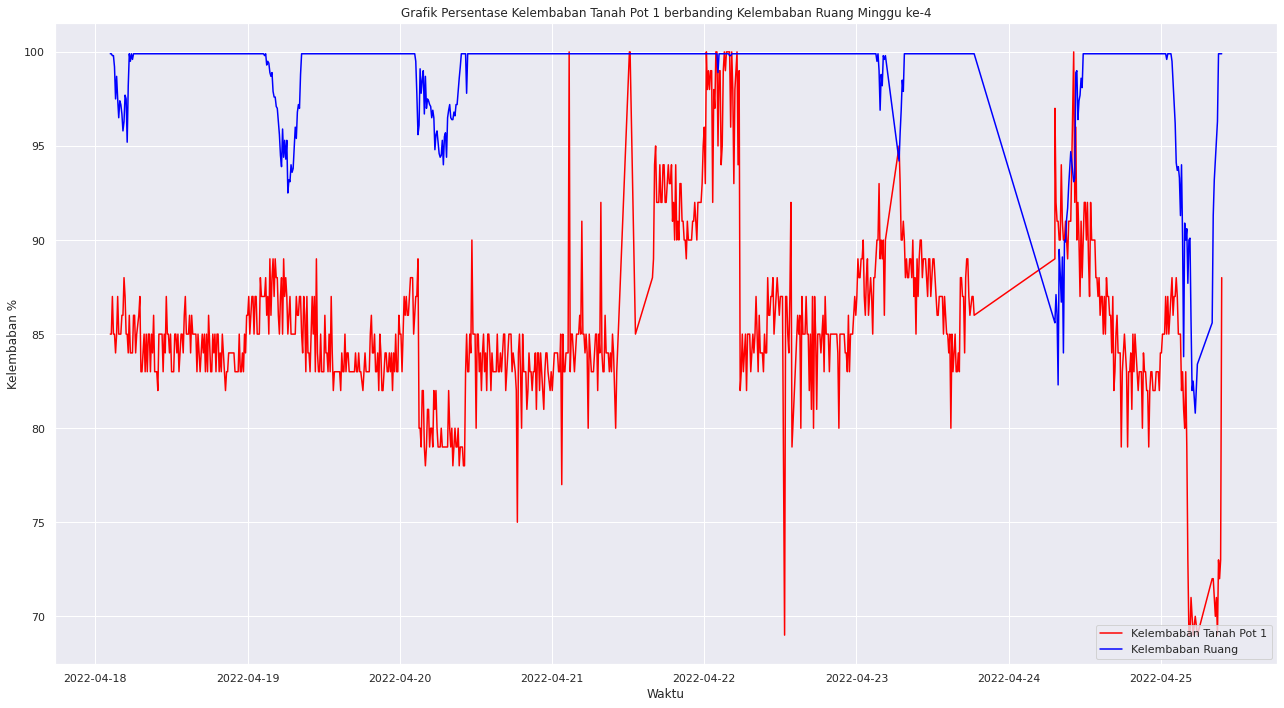

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor1'], color='red' )
# plt.legend(['Kelembaban Tanah Pot 1'])
plt.plot(timeVariableVisualizationWeek1['roomHumidity'], color='blue')
plt.legend(['Kelembaban Tanah Pot 1','Kelembaban Ruang'], loc ="lower right")
plt.title('Grafik Persentase Kelembaban Tanah Pot 1 berbanding Kelembaban Ruang Minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')

plt.tight_layout()

##### **Kelembaban tanah pot 2 Berbanding Waktu**


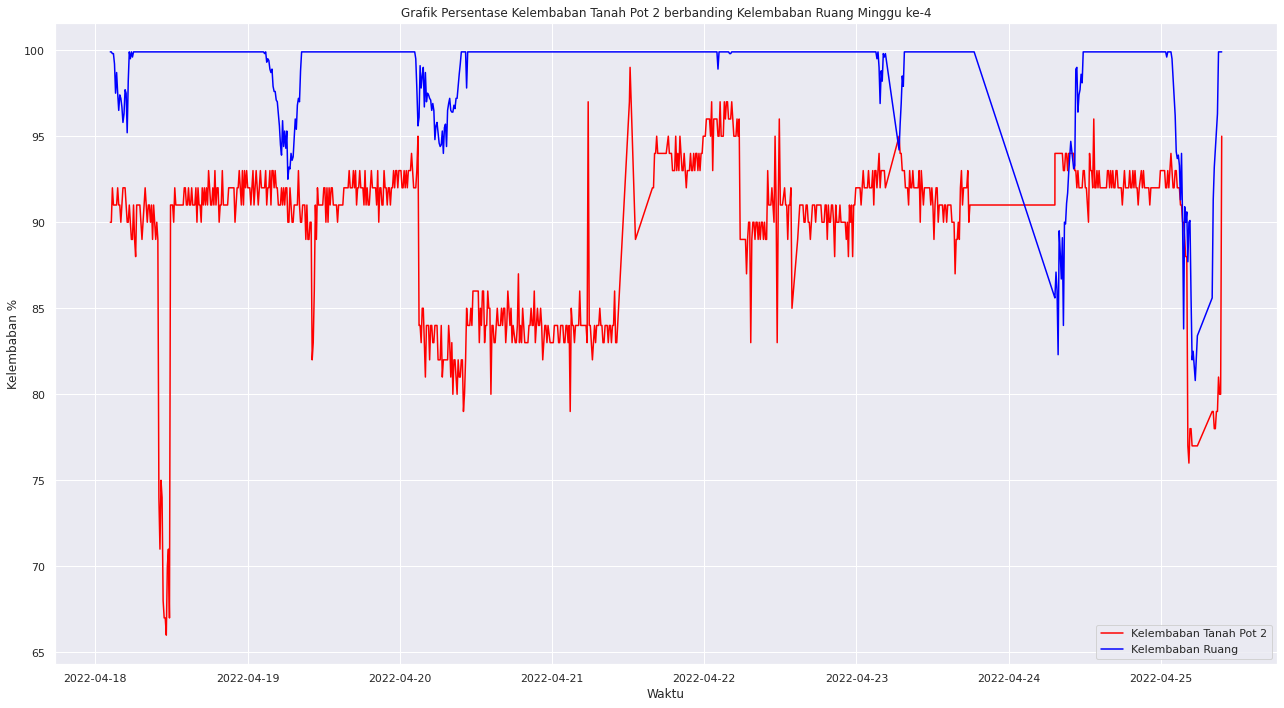

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor2'], color='red' )

plt.plot(timeVariableVisualizationWeek1['roomHumidity'], color='blue')
plt.legend(['Kelembaban Tanah Pot 2','Kelembaban Ruang'], loc ="lower right")
plt.title('Grafik Persentase Kelembaban Tanah Pot 2 berbanding Kelembaban Ruang Minggu ke-4')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')

plt.tight_layout()

##### **Perbandingan 2 potBerbanding Waktu**


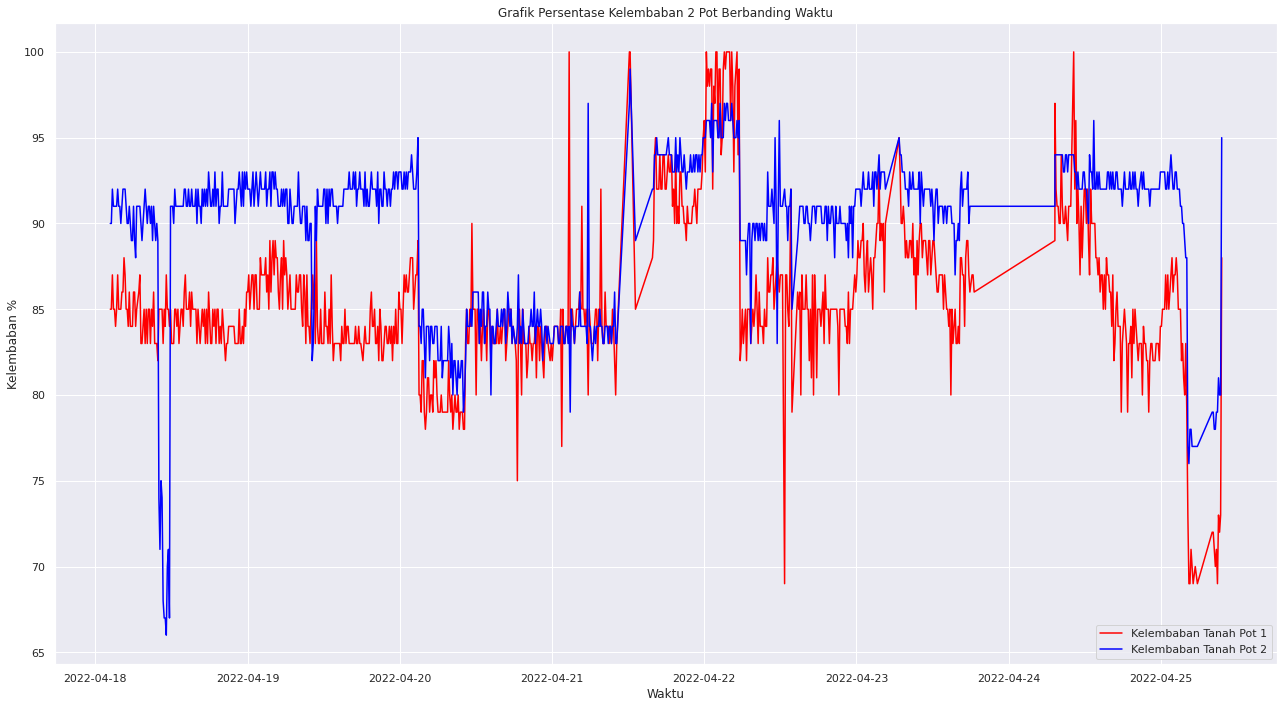

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor1'], color='red', )
plt.plot(timeVariableVisualizationWeek1['percentageSoilSensor2'], color='blue')
plt.legend(['Kelembaban Tanah Pot 1','Kelembaban Tanah Pot 2'], loc ="lower right")

plt.title('Grafik Persentase Kelembaban 2 Pot Berbanding Waktu')
plt.xlabel('Waktu')
plt.ylabel('Kelembaban %')
plt.tight_layout()

##### **Pump Status** 

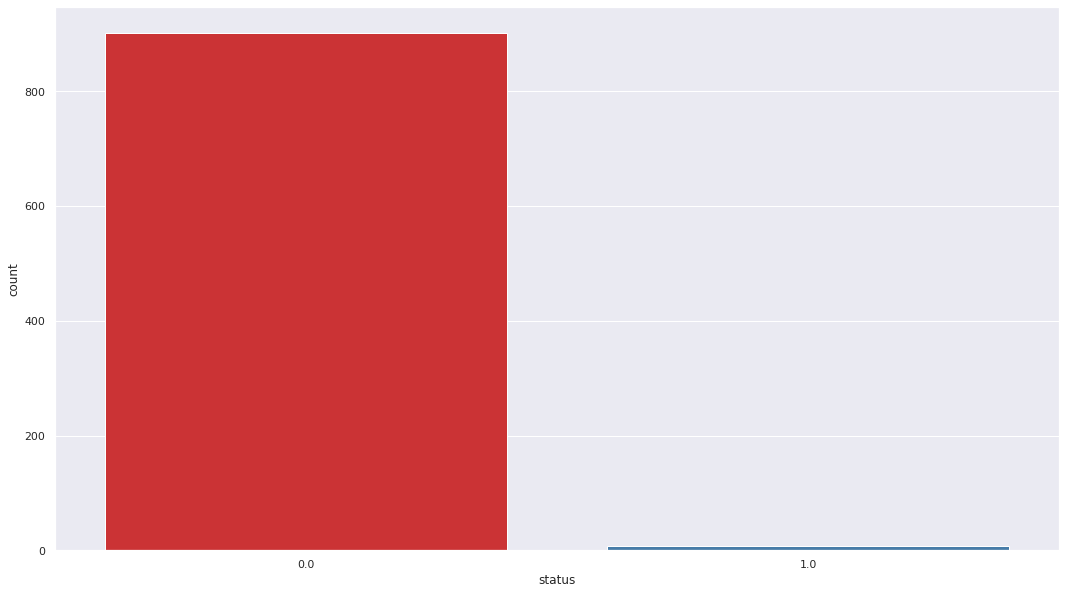

In [ ]:
plt.figure(figsize=(18,10))
sn.set(style="darkgrid")
ax = sn.countplot(x="status", data=timeVariableVisualizationWeek1, palette="Set1")

In [ ]:
timeVariableVisualizationWeek1['status'].value_counts()

0.0    902
1.0      8
Name: status, dtype: int64

#### **Heatmapped Data** <a id="4"></a>

In [ ]:
timeVariableVisualizationWeek1_NotIndexed.drop(['Ts', 'Date', 'Minute','voltageSoilSense1','voltageSoilSense2','bitSoilSensor1','bitSoilSensor2'], axis=1, inplace=True)
timeVariableVisualizationWeek1_NotIndexed

,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,week,Month,Day,Hour
0,63,82,99.6,30.0,0.0,1,3,29,8
1,65,83,98.1,30.0,0.0,1,3,29,8
2,64,81,98.9,30.2,0.0,1,3,29,8
3,72,82,98.7,30.5,0.0,1,3,29,8
4,73,84,97.5,31.0,0.0,1,3,29,9
...,...,...,...,...,...,...,...,...,...
4247,90,95,97.3,33.4,0.0,5,4,28,12
4248,89,95,98.6,32.6,0.0,5,4,28,12
4249,90,95,98.4,32.9,0.0,5,4,28,12
4250,89,95,97.5,33.6,0.0,5,4,28,12


In [ ]:
y = timeVariableVisualizationWeek1_NotIndexed['status']
x = timeVariableVisualizationWeek1_NotIndexed
# x = x.drop('status',axis=1)
x

,percentageSoilSensor1,percentageSoilSensor2,roomHumidity,roomTemperature,status,week,Month,Day,Hour
0,63,82,99.6,30.0,0.0,1,3,29,8
1,65,83,98.1,30.0,0.0,1,3,29,8
2,64,81,98.9,30.2,0.0,1,3,29,8
3,72,82,98.7,30.5,0.0,1,3,29,8
4,73,84,97.5,31.0,0.0,1,3,29,9
...,...,...,...,...,...,...,...,...,...
4247,90,95,97.3,33.4,0.0,5,4,28,12
4248,89,95,98.6,32.6,0.0,5,4,28,12
4249,90,95,98.4,32.9,0.0,5,4,28,12
4250,89,95,97.5,33.6,0.0,5,4,28,12


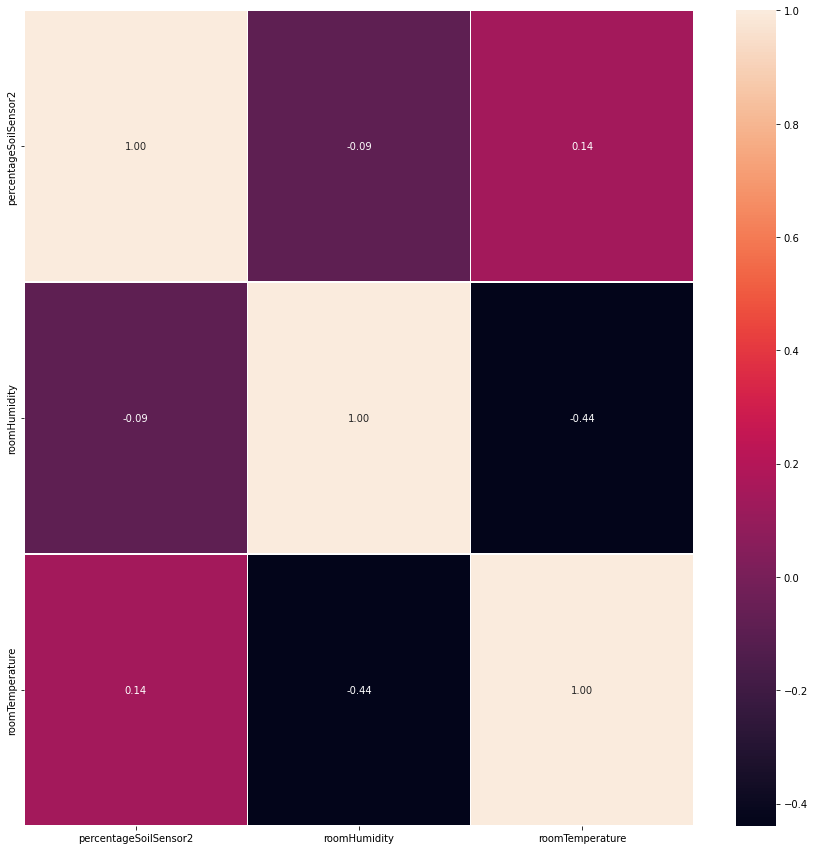

In [ ]:
corr = x.corr(method = 'kendall')
f, ax = plt.subplots(figsize = (15,15))
sn.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5, ax=ax)

### Algorithm For Neural Net/Normal Net


#### Model Comparison 

<hr>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
# svm = SVC(random_state=1)
# naive = GaussianNB()

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          # "SVM" : svm,
          # "Naive bayes" : naive
          }
scores= { }

for key, value in models.items():    
    model = value
    model.fit(X_train, y_train)
    scores[key] = model.score(X_test, y_test)
  


In [ ]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
Decision tree,0.960601
Random forest,0.960601
KNN,0.959565


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

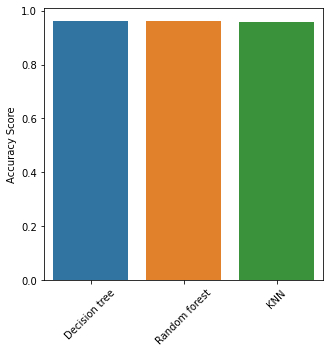

In [ ]:
plt.figure(figsize=(5,5))
sn.barplot(x=scores_frame.index,y=scores_frame["Accuracy Score"])
plt.xticks(rotation=45) # Rotation of Country names...

* It seems that KNN and Random Forest algorithms are far ahead of the others.
* So let's focus on these algorithms
 
#### K Fold Cross Validation <a id="12"></a>
<hr>
    
* With K-Fold cross-validation, we obtain "K" pieces of results from different mini-training sets from our main training set.
* Then we choose the average of these results as the actual result.
* After all, by taking the standard deviation of K result, we can examine whether the data is consistent.

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_random_forest = cross_val_score(estimator=ran, X=X_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
accuracies_decision_tree = cross_val_score(estimator=dec, X=X_train, y=y_train, cv=10)

In [ ]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())
print("Decision Tree Average accuracy: ", accuracies_decision_tree.mean())
print("Decision Tree Standart Deviation: ", accuracies_decision_tree.std())

Random Forest Average accuracy:  0.9643555573476341
Random Forest Standart Deviation:  0.005655427491069343
KNN Average accuracy:  0.9665579659012252
KNN Standart Deviation:  0.006349827628345748
Decision Tree Average accuracy:  0.9624120481441907
Decision Tree Standart Deviation:  0.007528293095564499


The standard deviation value shows that we achieve consistent results.

#### Decision Tree Classifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
clf = dec

In [ ]:
clf.score(X_test,y_test)

0.9606013478486263

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Model accuracy score with criterion default index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion default index: 0.9606


In [ ]:
y_pred_train_gini = clf.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9852
Test set score: 0.9606


In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf.fit(X_train, y_train)) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file='dectree.dot', 
                              feature_names=X_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,  
                              special_characters=True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'dectree.dot', '-o', 'dectree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'dectree.png')

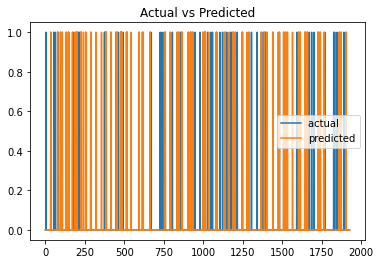

In [ ]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

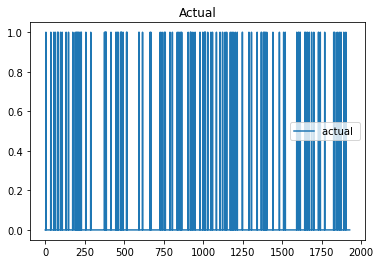

In [ ]:
dm = pd.DataFrame({'Actual': y_test}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
plt.plot(x_axis,y_axis)
plt.title("Actual")
plt.legend(["actual ","predicted"])
plt.show()

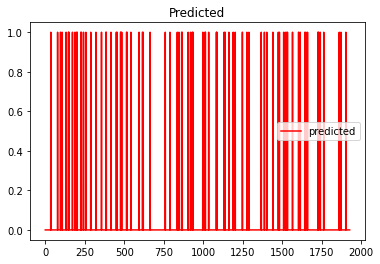

In [ ]:
dm = pd.DataFrame({'Predicted': y_pred}).reset_index()
x_axis=dm.index
y1_axis=dm.Predicted
plt.plot(x_axis,y1_axis, "r-")
plt.title("Predicted")
plt.legend(["predicted"])
plt.show()

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
# y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1793,24,1817
1,52,60,112
All,1845,84,1929


Text(0.5, 15.0, 'Predicted label')

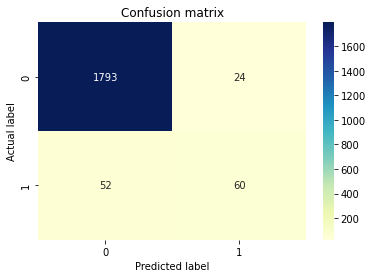

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1817
           1       0.71      0.54      0.61       112

    accuracy                           0.96      1929
   macro avg       0.84      0.76      0.80      1929
weighted avg       0.96      0.96      0.96      1929



In [ ]:
import joblib
joblib.dump(dec, 'dec_model.joblib')

['dec_model.joblib']

#### Random Forest Classifier

In [ ]:
model = ran

In [ ]:
y_test

6183    0
6210    0
1695    0
6191    0
5669    1
       ..
4892    0
639     0
2361    0
3697    0
1540    0
Name: status, Length: 1929, dtype: int64

In [ ]:
model.score(X_test,y_test)

0.9606013478486263

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
column_names = ['percentageSoilSensor2', 'roomHumidity', 
                'roomTemperature']

# feature_names = column_names[:-1]
print("Features: {}".format(column_names))
# label_name = column_names[-1]
# print("Label: {}".format(label_name))
class_names = ['Pump Off', 'Pump On']
print("Class name: {}".format(class_names))

Features: ['percentageSoilSensor2', 'roomHumidity', 'roomTemperature']
Class name: ['Pump Off', 'Pump On']


In [ ]:
estimator = model.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = column_names,
                class_names = class_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

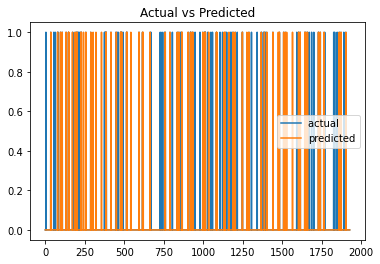

In [ ]:
dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
y1_axis=dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

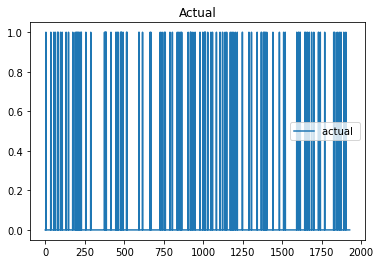

In [ ]:
dm = pd.DataFrame({'Actual': y_test}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
plt.plot(x_axis,y_axis)
plt.title("Actual")
plt.legend(["actual ","predicted"])
plt.show()

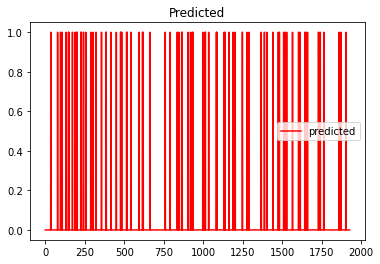

In [ ]:
dm = pd.DataFrame({'Predicted': y_pred}).reset_index()
x_axis=dm.index
y1_axis=dm.Predicted
plt.plot(x_axis,y1_axis, "r-")
plt.title("Predicted")
plt.legend(["predicted"])
plt.show()

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
# y_pred = knn.predict(X_test)

confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1794,23,1817
1,53,59,112
All,1847,82,1929


Text(0.5, 15.0, 'Predicted label')

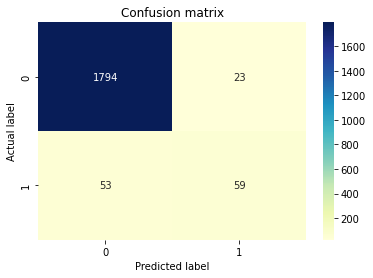

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1817
           1       0.72      0.53      0.61       112

    accuracy                           0.96      1929
   macro avg       0.85      0.76      0.79      1929
weighted avg       0.96      0.96      0.96      1929



In [ ]:
joblib.dump(model, 'ran_model.joblib')

['ran_model.joblib']

#### KNeighborsClassifier

In [ ]:
test_scores = []
train_scores = []

for i in range(1,15):
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 96.68178872326637 % and k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 95.95645412130638 % and k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


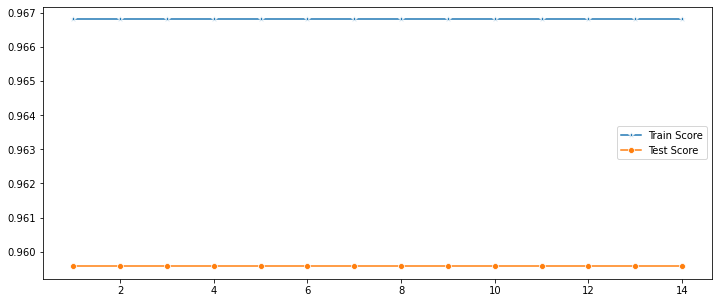

In [ ]:
plt.figure(figsize=(12,5))
p = sn.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sn.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9657853810264385

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1805,12,1817
1,54,58,112
All,1859,70,1929


Text(0.5, 15.0, 'Predicted label')

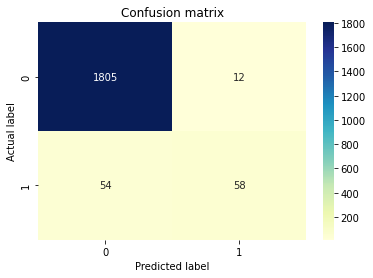

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

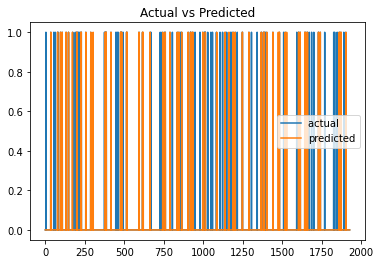

In [ ]:
xy = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=xy.index
y_axis=xy.Actual
y1_axis=xy.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

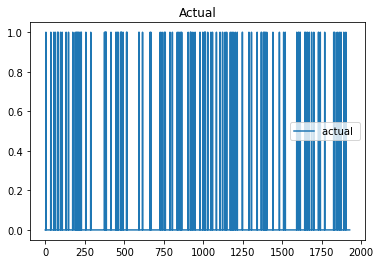

In [ ]:
dm = pd.DataFrame({'Actual': y_test}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
plt.plot(x_axis,y_axis)
plt.title("Actual")
plt.legend(["actual ","predicted"])
plt.show()

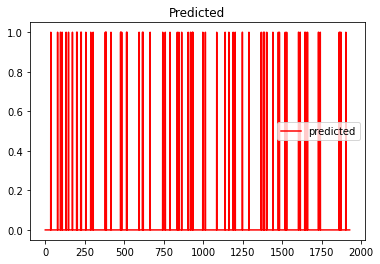

In [ ]:
dm = pd.DataFrame({'Predicted': y_pred}).reset_index()
x_axis=dm.index
y1_axis=dm.Predicted
plt.plot(x_axis,y1_axis, "r-")
plt.title("Predicted")
plt.legend(["predicted"])
plt.show()

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1817
           1       0.83      0.52      0.64       112

    accuracy                           0.97      1929
   macro avg       0.90      0.76      0.81      1929
weighted avg       0.96      0.97      0.96      1929



In [ ]:
joblib.dump(knn, 'knn_model.joblib')

['knn_model.joblib']

#### Adding ROC

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

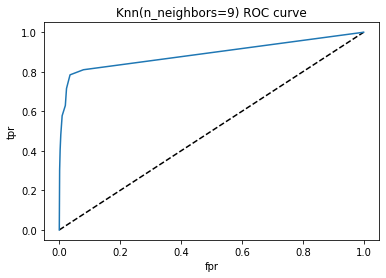

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8901420773341956

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9527151104887404
Best Parameters: {'n_neighbors': 10}


In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn_cv.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1803,10,1813
1,47,69,116
All,1850,79,1929


In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1813
           1       0.87      0.59      0.71       116

    accuracy                           0.97      1929
   macro avg       0.92      0.79      0.85      1929
weighted avg       0.97      0.97      0.97      1929



Text(0.5, 15.0, 'Predicted label')

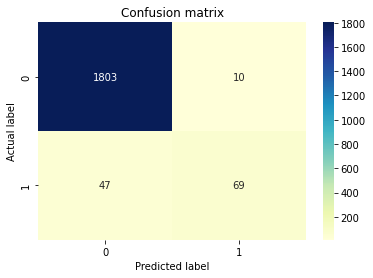

In [ ]:
y_pred = knn_cv.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

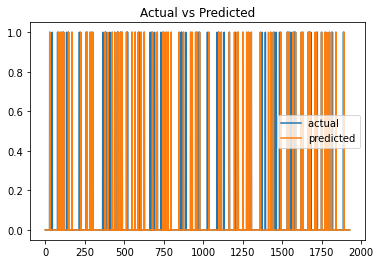

In [ ]:
z = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=z.index
y_axis=z.Actual
y1_axis=z.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

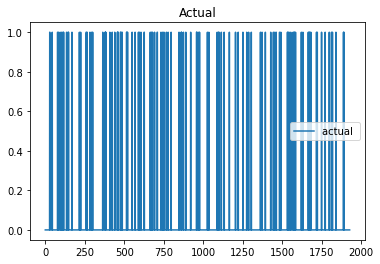

In [ ]:
z = pd.DataFrame({'Actual': y_test}).reset_index()
x_axis=z.index
y_axis=z.Actual
plt.plot(x_axis,y_axis)
plt.title("Actual")
plt.legend(["actual ","predicted"])
plt.show()

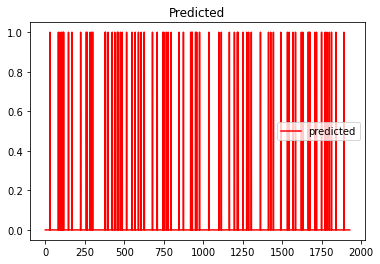

In [ ]:
z = pd.DataFrame({'Predicted': y_pred}).reset_index()
x_axis=z.index
y1_axis=z.Predicted
plt.plot(x_axis,y1_axis, "r-")
plt.title("Predicted")
plt.legend(["predicted"])
plt.show()

#### Logistic Regression

In [ ]:
# Instantiate the model using the default parameters
lr = LogisticRegression()

#fit the model with the data
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1806,   11],
       [  89,   23]])

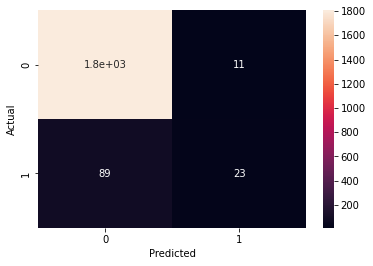

In [ ]:
cnf_matrix = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(cnf_matrix, annot=True)

In [ ]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)
print('Accuracy score : ', accuracyScore)
print("Accuracy in Percentage : ", int(accuracyScore*100),'%')

Accuracy score :  0.9481596682218766
Accuracy in Percentage :  94 %


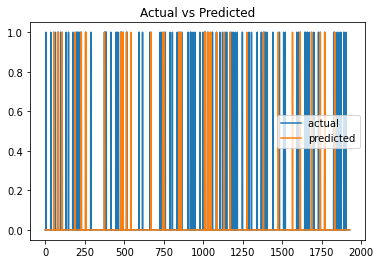

In [ ]:
xy = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=xy.index
y_axis=xy.Actual
y1_axis=xy.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

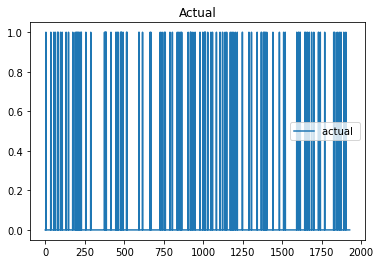

In [ ]:
dm = pd.DataFrame({'Actual': y_test}).reset_index()
x_axis=dm.index
y_axis=dm.Actual
plt.plot(x_axis,y_axis)
plt.title("Actual")
plt.legend(["actual ","predicted"])
plt.show()

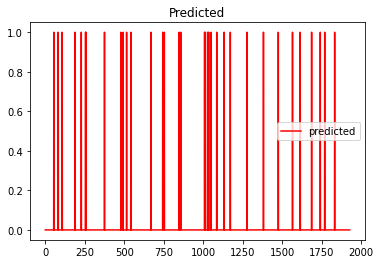

In [ ]:
dm = pd.DataFrame({'Predicted': y_pred}).reset_index()
x_axis=dm.index
y1_axis=dm.Predicted
plt.plot(x_axis,y1_axis, "r-")
plt.title("Predicted")
plt.legend(["predicted"])
plt.show()

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1817
           1       0.68      0.21      0.32       112

    accuracy                           0.95      1929
   macro avg       0.81      0.60      0.64      1929
weighted avg       0.94      0.95      0.93      1929



In [ ]:
joblib.dump(lr, 'lr_model.joblib')

['lr_model.joblib']

#### Random Forest Classifier

In [ ]:
model_classifier = RandomForestClassifier(n_estimators=100)
model_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
model_classifier.score(X_test,y_test)

0.9836888331242158

In [ ]:
y_test

487     0.0
2758    0.0
764     0.0
3410    0.0
2564    0.0
       ... 
2712    0.0
582     0.0
4246    0.0
4135    0.0
631     0.0
Name: status, Length: 797, dtype: float64

In [ ]:
y_pred = model_classifier.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
estimator = model_classifier.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_rfc.dot', 
                feature_names = column_names,
                class_names = class_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree_rfc.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_rfc.png')

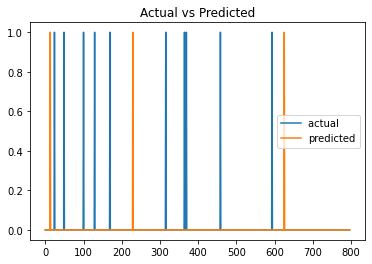

In [ ]:
rfc_dm = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index()
x_axis=rfc_dm.index
y_axis=rfc_dm.Actual
y1_axis=rfc_dm.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted")
plt.legend(["actual ","predicted"])
plt.show()

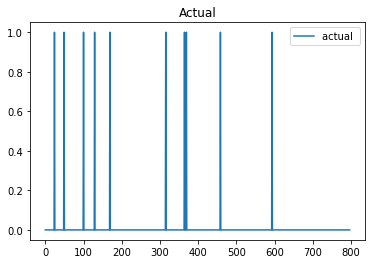

In [ ]:
rfc_dm = pd.DataFrame({'Actual': y_test}).reset_index()
x_axis=rfc_dm.index
y_axis=rfc_dm.Actual
plt.plot(x_axis,y_axis)
plt.title("Actual")
plt.legend(["actual ","predicted"])
plt.show()

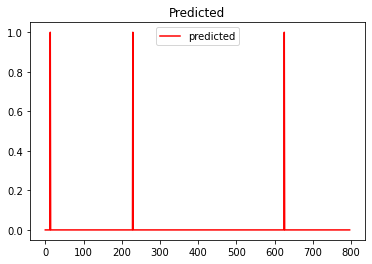

In [ ]:
rfc_dm = pd.DataFrame({'Predicted': y_pred}).reset_index()
x_axis=rfc_dm.index
y1_axis=rfc_dm.Predicted
plt.plot(x_axis,y1_axis, "r-")
plt.title("Predicted")
plt.legend(["predicted"])
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,784,3,787
1.0,10,0,10
All,794,3,797


Text(0.5, 15.0, 'Predicted label')

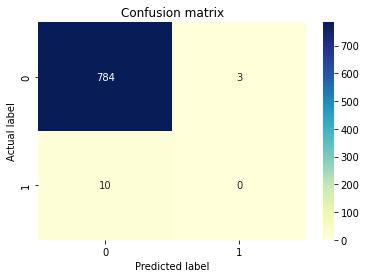

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sn.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       787
         1.0       0.00      0.00      0.00        10

    accuracy                           0.98       797
   macro avg       0.49      0.50      0.50       797
weighted avg       0.98      0.98      0.98       797



#### RandomForestClassification + KFoldCrossValidation

In [ ]:
accuracies_random_forest = cross_val_score(estimator=model_classifier, X=X_train, y=y_train, cv=10)

NameError: ignored

In [ ]:
accuracies_random_forest

array([0.99059561, 0.99059561, 0.99059561, 0.99373041, 0.99373041,
       0.99373041, 0.99059561, 0.98746082, 0.99371069, 0.99371069])

In [ ]:
accuracies_random_forest.score(X_test,y_test)

AttributeError: ignored

In [ ]:
y_test

394     0.0
3097    0.0
1894    1.0
1279    0.0
3334    0.0
       ... 
2546    0.0
3189    0.0
1613    0.0
1372    0.0
1999    0.0
Name: status, Length: 631, dtype: float64

In [ ]:
y_pred = model_classifier.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
estimator = model_classifier.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree_rfc.dot', 
                feature_names = feature_names,
                class_names = class_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree_rfc.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_rfc.png')

#### Deep Neural Network

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=12, input_shape=[9,]),  # input shape required
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(64, activation=tf.nn.relu,),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(32, activation=tf.nn.relu,),
  tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                120       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                832       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                        

In [ ]:
train_dataset

array([[1648913820352, 1519, 1639, ..., 2, 22, 37],
       [1649558029818, 1463, 1456, ..., 10, 9, 33],
       [1648941420088, 1552, 1655, ..., 3, 6, 17],
       ...,
       [1649099806240, 1427, 1373, ..., 5, 2, 16],
       [1650830088396, 1472, 1441, ..., 25, 2, 54],
       [1650573591530, 1433, 1442, ..., 22, 3, 39]], dtype=object)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_object = tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="binary_crossentropy",
)

model.compile(optimizer = optimizer,
              loss=loss_object,
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=100)

Epoch 1/100
100/100 [==============================] - 2s 8ms/step - loss: 0.3325 - accuracy: 0.9495 - val_loss: 0.1935 - val_accuracy: 0.9875
Epoch 2/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1028 - accuracy: 0.9931 - val_loss: 0.1935 - val_accuracy: 0.9875
Epoch 3/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1066 - accuracy: 0.9931 - val_loss: 0.1935 - val_accuracy: 0.9875
Epoch 4/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.9931 - val_loss: 0.1935 - val_accuracy: 0.9875
Epoch 5/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1064 - accuracy: 0.9931 - val_loss: 0.1935 - val_accuracy: 0.9875
Epoch 6/100
100/100 [==============================] - 0s 5ms/step - loss: 0.1065 - accuracy: 0.9931 - val_loss: 0.1935 - val_accuracy: 0.9875
Epoch 7/100
100/100 [==============================] - 1s 5ms/step - loss: 0.1065 - accuracy: 0.9931 - val_loss: 0.1935 - val_accuracy: 0.9875

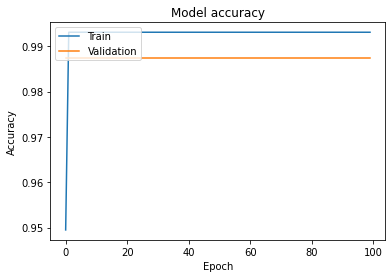

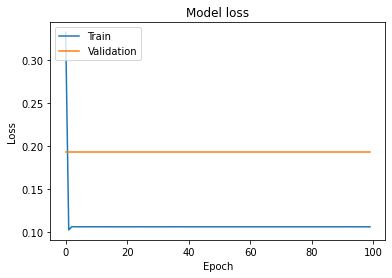

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()